# Get transaction data for Bread Network for one day
Date: 2018-12-22 \
Token: Bread (BRD) \
Contract: 0x558EC3152e2eb2174905cd19AeA4e34A23DE9aD6

In [3]:
contract = "0x558EC3152e2eb2174905cd19AeA4e34A23DE9aD6"
symbol = "brd"

In [4]:
import requests

URL = "https://api.coingecko.com/api/v3/coins/list?include_platform=true"
r = requests.get(url = URL)
data = r.json()

for token in data:
    if token["symbol"] == symbol:
        print(token)
        eth_address = token["platforms"]["ethereum"]

print("Is contract equal to API-Data?: ", eth_address == contract.lower())

{'id': 'brd', 'symbol': 'brd', 'name': 'Board', 'platforms': {'algorand': '1054801592'}}


KeyError: 'ethereum'

In [ ]:
import time
import datetime

start_date = datetime.datetime.strptime("2018-12-22 12:00", "%Y-%m-%d %H:%M")
end_date = datetime.datetime.strptime("2018-12-24 12:00", "%Y-%m-%d %H:%M")

unix_start_date = time.mktime(start_date.timetuple())
unix_end_date = time.mktime(end_date.timetuple())

In [ ]:
URL = f"https://coins.llama.fi/block/ethereum/{unix_start_date}"
r = requests.get(url = URL)
data = r.json()
block_number_start = data["height"]

URL = f"https://coins.llama.fi/block/ethereum/{unix_end_date}"
r = requests.get(url = URL)
data = r.json()
block_number_end = data["height"]

In [ ]:
hex_block_number_start = hex(block_number_start)
hex_block_number_end = hex(block_number_end)

In [ ]:
# All data for that day
import json

alchemy_api_key = "4zWEsHMFRJ5CqkZLIp5m3322BRPbwB1q"
my_url = f"https://eth-mainnet.g.alchemy.com/v2/{alchemy_api_key}"
my_headers = {
    "Accept": "application/json",
    "Content-Type": "application/json"
}
params = {'jsonrpc': '2.0', 'method': 'alchemy_getAssetTransfers', 'params': [
    {
      "fromBlock": hex_block_number_start,
      "toBlock": hex_block_number_end,
      "contractAddresses": [contract],
      "category": ["erc20"],
      "withMetadata": True,
      "excludeZeroValue": True,
      # "maxCount": "0x3e8" # maximum transactions possible
    }
  ]}


r = requests.post(url = my_url, json=params, headers=my_headers)
data = r.json()
json_data = json.dumps(data, indent=4)
 
with open(f"alchemy_answer_{symbol}.json", "w") as outfile:
    outfile.write(json_data)

json_data = json.loads(json_data)
print("Number of returned transfers: ",len(json_data["result"]["transfers"]))

In [ ]:
timestamps = list()
for transfer in json_data["result"]["transfers"]:
    timestamps.append(transfer['metadata']['blockTimestamp'])

In [ ]:
def set_time_to_zero(timestamp):
    print(timestamp)
    parts = timestamp.split('T')
    date = parts[0]
    time_parts = parts[1].split(':')
    hour = time_parts[0]
    modified_timestamp = date + ' ' + hour + ':00:00'
    return modified_timestamp

timestamps = [set_time_to_zero(timestamp) for timestamp in timestamps]
print(timestamps)


2018-08-20T10:22:46.000Z
2018-08-20T12:44:43.000Z
2018-08-20T12:44:43.000Z
2018-08-20T12:58:56.000Z
2018-08-20T12:58:56.000Z
2018-08-20T18:06:25.000Z
2018-08-20T19:15:36.000Z
2018-08-20T20:00:52.000Z
2018-08-20T20:19:49.000Z
2018-08-20T22:09:03.000Z
2018-08-20T22:14:04.000Z
2018-08-20T23:47:03.000Z
2018-08-21T00:03:02.000Z
2018-08-21T01:30:54.000Z
2018-08-21T01:35:45.000Z
2018-08-21T01:53:10.000Z
2018-08-21T02:53:00.000Z
2018-08-21T03:13:15.000Z
2018-08-21T04:47:50.000Z
2018-08-21T05:42:49.000Z
2018-08-21T06:26:51.000Z
2018-08-21T06:26:51.000Z
2018-08-21T06:32:30.000Z
2018-08-21T06:37:19.000Z
2018-08-21T06:44:57.000Z
2018-08-21T06:57:55.000Z
2018-08-21T07:04:37.000Z
2018-08-21T07:04:37.000Z
2018-08-21T07:09:34.000Z
2018-08-21T07:22:46.000Z
2018-08-21T07:26:47.000Z
2018-08-21T07:26:54.000Z
2018-08-21T07:34:26.000Z
2018-08-21T07:35:30.000Z
2018-08-21T07:44:37.000Z
2018-08-21T07:44:37.000Z
2018-08-21T09:30:32.000Z
2018-08-21T09:34:00.000Z
2018-08-21T09:44:23.000Z
2018-08-21T10:11:58.000Z


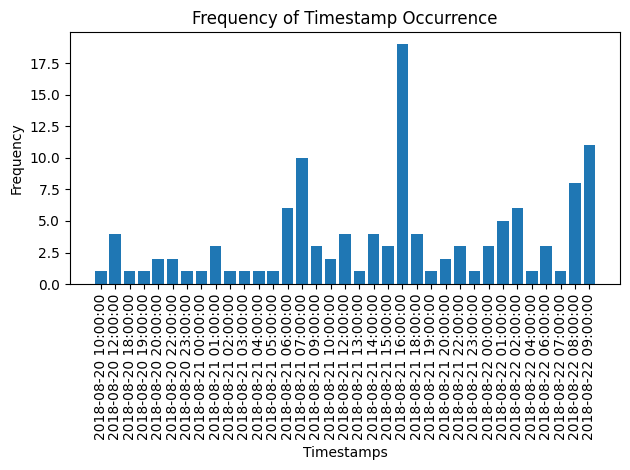

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter

timestamp_counts = Counter(timestamps)
x = range(len(timestamp_counts))
y = list(timestamp_counts.values())
labels = list(timestamp_counts.keys())

plt.bar(x, y)
plt.xlabel('Timestamps')
plt.ylabel('Frequency')
plt.title('Frequency of Timestamp Occurrence')
plt.xticks(x, labels, rotation='vertical')
plt.tight_layout()
plt.show()

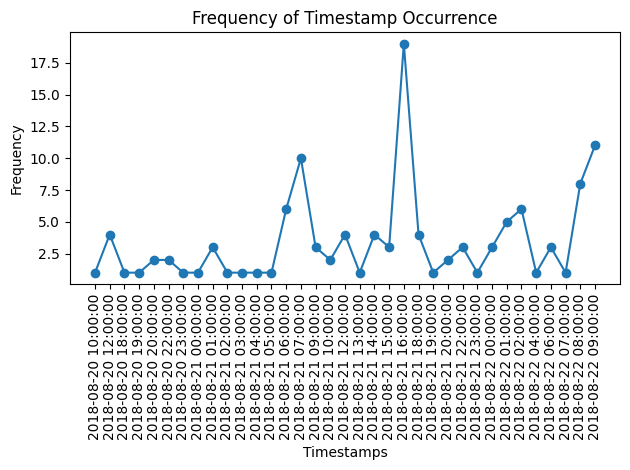

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter

timestamp_counts = Counter(timestamps)
x = range(len(timestamp_counts))
y = list(timestamp_counts.values())
labels = list(timestamp_counts.keys())
plt.plot(x, y, marker='o')
plt.xlabel('Timestamps')
plt.ylabel('Frequency')
plt.title('Frequency of Timestamp Occurrence')
plt.xticks(x, labels, rotation='vertical')
plt.tight_layout()
plt.show()

Counter({'2018-08-21 16:00:00': 19, '2018-08-22 09:00:00': 11, '2018-08-21 07:00:00': 10, '2018-08-22 08:00:00': 8, '2018-08-21 06:00:00': 6, '2018-08-22 02:00:00': 6, '2018-08-22 01:00:00': 5, '2018-08-20 12:00:00': 4, '2018-08-21 12:00:00': 4, '2018-08-21 14:00:00': 4, '2018-08-21 18:00:00': 4, '2018-08-21 01:00:00': 3, '2018-08-21 09:00:00': 3, '2018-08-21 15:00:00': 3, '2018-08-21 22:00:00': 3, '2018-08-22 00:00:00': 3, '2018-08-22 06:00:00': 3, '2018-08-20 20:00:00': 2, '2018-08-20 22:00:00': 2, '2018-08-21 10:00:00': 2, '2018-08-21 20:00:00': 2, '2018-08-20 10:00:00': 1, '2018-08-20 18:00:00': 1, '2018-08-20 19:00:00': 1, '2018-08-20 23:00:00': 1, '2018-08-21 00:00:00': 1, '2018-08-21 02:00:00': 1, '2018-08-21 03:00:00': 1, '2018-08-21 04:00:00': 1, '2018-08-21 05:00:00': 1, '2018-08-21 13:00:00': 1, '2018-08-21 19:00:00': 1, '2018-08-21 23:00:00': 1, '2018-08-22 04:00:00': 1, '2018-08-22 07:00:00': 1})


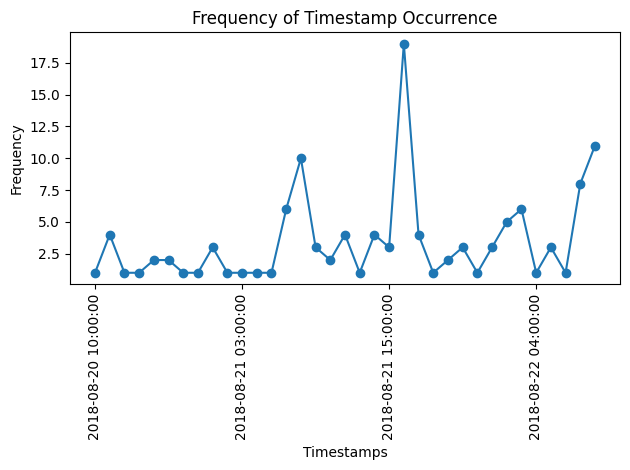

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter

timestamp_counts = Counter(timestamps)
x = range(len(timestamp_counts))
y = list(timestamp_counts.values())
labels = list(timestamp_counts.keys())


plt.plot(x, y, marker='o')
plt.xlabel('Timestamps')
plt.ylabel('Frequency')
plt.title('Frequency of Timestamp Occurrence')

tick_indices = list(range(0, len(labels), 10))
tick_labels = [labels[i] for i in tick_indices]
plt.xticks(tick_indices, tick_labels, rotation='vertical')
plt.tight_layout()
plt.show()
